# Data Science Module 1 Final Project: <br>Predicting the Sale Price of Houses in King County

Student Names: Natasha Kacoroski and David Kaspar <br>
Student Pace: Full time <br>
Scheduled Project Review Date/Time: 17 April 2019, 10:45 a.m. <br>
Instructor Names: Miles Erickson and Greg Damico <br>
Blog Post URL: TBD <br>

## Step 1: Load Libraries and Obtain Data

We import the following libraries.

In [1]:
import pandas as pd # to easily manipulate data in dataframes
import numpy as np # to perform mathematical functions with the data
import seaborn as sns # to graph the data
import matplotlib.pyplot as plt # to graph the data
import sklearn as sk # to build a regression model with the data
from sklearn.model_selection import train_test_split # to split the data into training and testing groups
from sklearn.linear_model import LinearRegression # to perform regressions on the data
from sklearn.metrics import mean_squared_error # to find mean squared error of data
from sklearn.model_selection import cross_val_score # to find cross validation score of data
from scipy import stats # to determine data statistics
from scipy.stats import zscore, norm # to take the zscore and norm of the data


# to make graph figures inline with the jupyter notebook
%matplotlib inline 

Then import the data from a csv file into a pandas dataframe.

In [2]:
df_total = pd.read_csv('kc_house_data.csv')

And save 15% of the data to validate our model at the end.

In [3]:
msk = np.random.rand(len(df_total)) < 0.85 # Set percentage of data aside
df = df_total[msk].copy() # Assign data for training and testing to dataframe
validate_df = df_total[~msk].copy() # Assign data to validate to dataframe

## Step 2: Scrub Data

### Preview and Initial Observations

We transpose the head of the data to see all the columns easily.

In [4]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


Columns are correctly labeled. To confirm our understanding we import the markdown documentation file on column information.

In [5]:
# adapted from: https://groups.google.com/forum/#!topic/jupyter/uOe3PyxbcqU

from IPython.display import display, Markdown

with open('column_names.md', 'r') as fh:
    content = fh.read()

display(Markdown(content))

COLUMN NAMES AND DESCRIPTIONS FOR KING COUNTRY DATA SET
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


Most column descriptions confirm what we inferred from the column name. We learn that view means whether the house has been viewed (assumed to be potential buyers), and sqft_living15 and sqft_lot15 refer to the square footage of interior housing living space and land lots for nearest 15 neighbors. Also of interest is the grade given to housing unit based on King County grading system found here: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r.

BUILDING GRADE <br>
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 = Falls short of minimum building standards. Normally cabin or inferior structure.

4 = Generally older, low quality construction. Does not meet code.

5 = Low construction costs and workmanship. Small, simple design.

6 = Lowest grade currently meeting building code. Low quality materials and simple designs.

7 = Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 = Just above average in construction and design. Usually better materials in both the exterior and interior finish     work.

9 = Better architectural design with extra interior and exterior design and quality.

10 = Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 = Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 = Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13  = Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

After understanding the column descriptions, we look at the value information for each column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18366 entries, 0 to 21595
Data columns (total 21 columns):
id               18366 non-null int64
date             18366 non-null object
price            18366 non-null float64
bedrooms         18366 non-null int64
bathrooms        18366 non-null float64
sqft_living      18366 non-null int64
sqft_lot         18366 non-null int64
floors           18366 non-null float64
waterfront       16344 non-null float64
view             18311 non-null float64
condition        18366 non-null int64
grade            18366 non-null int64
sqft_above       18366 non-null int64
sqft_basement    18366 non-null object
yr_built         18366 non-null int64
yr_renovated     15092 non-null float64
zipcode          18366 non-null int64
lat              18366 non-null float64
long             18366 non-null float64
sqft_living15    18366 non-null int64
sqft_lot15       18366 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.1+ MB


Our dataframe has 21,587 entries and 21 columns, with data types of float64(8), int64(11), and object(2). There are null values in waterfront, view, and yr_renovated. Columns to consider changing data types are: id from int64 to a object (value is independent of magnitude), date to a timestamp (makes it easier to manipulate), sqft_basement from object to int64 (value is dependent on magnitude), and zipcode from int64 to object (value is independent of magnitude). Also, yr_built is int64 while yr_renovated is float64, which is odd and needs further investigation. It would also be useful to know which columns contain continuous or discrete data because that will influence how we deal with null values and will be a factor in determining one-hot encoding.

### Address null values and determine if values are continuous or discrete

We start by making a function that returns the null value percentange and whether data is continuous or discrete.

In [7]:
def null_percentage_and_data_continuity(df):
    """Returns data type, percentage of null values in data column if nulls exist, 
    and whether data is continuous or discrete."""
    display_df = df.head(1).applymap(type) # make dataframe of data types
    percent_nan = {} # null percentage dictionary
    disc_or_cont = {} # discrete or continuous dictionary
    for i, col in enumerate(df): # iterate through each column
        col_percent_nan = round(100*df[col].isna().sum() / len(df[col]), 2) # find null percentage
        percent_nan[col] = [col_percent_nan] # add to dictionary
        if df[col].nunique() < 100: # less than 100 unique values, add to dictionary as discrete, otherwise continuous
            disc_or_cont[col] = ['disc'] 
        else:
            disc_or_cont[col] = ['cont'] 
    percent_nan_df = pd.DataFrame.from_dict(percent_nan, orient='columns') # make dataframes of dictionaries
    disc_or_cont_df = pd.DataFrame.from_dict(disc_or_cont, orient='columns')
    final = pd.concat([display_df, percent_nan_df, disc_or_cont_df]).T # combine all dataframes in one
    final.columns = ['dtype', 'percent null', 'cont or disc']
    return final # return combined dataframe

In [8]:
null_percentage_and_data_continuity(df)

,dtype,percent null,cont or disc
id,<class 'int'>,0,cont
date,<class 'str'>,0,cont
price,<class 'float'>,0,cont
bedrooms,<class 'int'>,0,disc
bathrooms,<class 'float'>,0,disc
sqft_living,<class 'int'>,0,cont
sqft_lot,<class 'int'>,0,cont
floors,<class 'float'>,0,disc
waterfront,<class 'float'>,11.01,disc
view,<class 'float'>,0.3,disc


For waterfront, 11% of the values are null and the data appears to be discrete. We check the unique values.

In [9]:
print(df['waterfront'].unique())
print(df['waterfront'].value_counts())
for count in list(df['waterfront'].value_counts()):
    print(count / sum(list(df['waterfront'].value_counts()))*100)

[nan  0.  1.]
0.0    16216
1.0      128
Name: waterfront, dtype: int64
99.2168379833578
0.7831620166421929


Waterfront is binary, with 0 as no waterfront view and 1 as a waterfront view. Since the value count of 0 is significantly more common (99.2%), we replace all null values with 0.

In [10]:
df.loc[:, 'waterfront'] = df['waterfront'].fillna(0.0)
df.waterfront.isna().any()

False

Moving onto view. The description for view is "has been viewed." Although we cannot confirm, we picture this as the number of people who have viewed the house at the time that the data for this house sale was collected. 0.29% of the view values are null and it appears to be discrete. Below we check the unique values.

In [11]:
print(df['view'].unique())
print(df['view'].value_counts())
print(df['view'].median())
for count in list(df['view'].value_counts()):
    print(count / sum(list(df['view'].value_counts()))*100)

[ 0.  3.  2.  4. nan  1.]
0.0    16506
2.0      808
3.0      443
4.0      285
1.0      269
Name: view, dtype: int64
0.0
90.14253727267763
4.412648135000819
2.419310796788815
1.5564414832614275
1.4690623122713122


Since the value count of 0 is significantly more common (90.2%, also the median), we decided to replace all null values with 0.

In [12]:
df.loc[:, 'view'] = df['view'].fillna(0.0)
df['view'].isna().any()

False

For yr_renovated, the values are the year where any renovations took place. They appear to be discrete and 17.8% of the values are null. Below are the unique values.

In [13]:
print(df['yr_renovated'].value_counts().head())
renovated_num = df.loc[df['yr_renovated'] > 0, :].shape[0]
renovated_num/len(df)*100

0.0       14450
2014.0       61
2003.0       30
2013.0       27
2000.0       26
Name: yr_renovated, dtype: int64


3.495589676576282

Looking at the unique values we see that null and 0 are values for year renovated. We were already aware of the nulls, and decide that 0 could either mean that house was never renovated or renovations were not tracked. We decided to drop year renovated because of the uncertainty and because actual house renovations are only 3.4% of the year renovated values. 

In [14]:
df.drop('yr_renovated', axis=1, inplace=True)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Change data types

For the ID column we considered changing the values to an object and making that the primary key. From looking at unique values for the column (see below), we saw that there were some duplicates because the ID seems to refer to house sale instance, and some houses have been sold more than once. Since the ID column is not valuable to us as a primary key, we decided to drop the column. We also considered dropping duplicate values, but since we are using data about all house sale instances, we decided to keep it in.

In [15]:
df['id'].duplicated().any()

True

In [16]:
df.drop('id', axis=1, inplace=True)
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

To change the sqft_basement from an object to an integer, we try using pd.to_numeric, this returns an error. Looking at unique values, we see that the only non-numeric value are questionmarks.

In [17]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '?', '730.0', '1700.0', '300.0', '970.0',
       '760.0', '700.0', '780.0', '790.0', '330.0', '1620.0', '360.0',
       '588.0', '1510.0', '410.0', '990.0', '600.0', '560.0', '1000.0',
       '1600.0', '500.0', '1040.0', '1010.0', '240.0', '290.0', '800.0',
       '540.0', '880.0', '710.0', '840.0', '380.0', '770.0', '480.0',
       '570.0', '1490.0', '1270.0', '120.0', '650.0', '180.0', '450.0',
       '1640.0', '1460.0', '1020.0', '750.0', '640.0', '1070.0', '490.0',
       '1310.0', '630.0', '2000.0', '390.0', '430.0', '850.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1820.0', '200.0', '1150.0', '1200.0', '680.0', '530.0',
       '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0', '1250.0',
       '1100.0', '460.0', '1400.0', '720.0', '660.0', '1220.0', '900.0',
       '420.0', '1580.0', '1380.0', '475.0', '690.0', '350.0', '935.0',
       '1370.0', '980.0', '1130.0', '620.0', '1470.0', '

In [18]:
print(df['sqft_basement'].value_counts().head())
questionmark_num = df.loc[df['sqft_basement'] == '?', :].shape[0]
questionmark_num/len(df)*100

0.0      10892
?          374
600.0      190
800.0      177
500.0      173
Name: sqft_basement, dtype: int64


2.0363715561363387

Although the questionmark has the second highest value count, it is only 2.1% of the sqft_basement values. Since we have square foot living and square foot above data, we replace each questionmark with the difference of the two values. 

In [19]:
df.sqft_basement = df.sqft_basement.replace('?', df['sqft_living'] - df['sqft_above'])
df.sqft_basement = pd.to_numeric(df['sqft_basement'])
df.sqft_basement.dtype

dtype('float64')

Moving on to zipcode, all the unique values look like zipcodes, so we convert them to strings.

In [20]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98003, 98146, 98007, 98115,
       98126, 98019, 98103, 98133, 98092, 98030, 98119, 98052, 98027,
       98117, 98058, 98001, 98056, 98166, 98053, 98023, 98070, 98148,
       98105, 98042, 98008, 98144, 98004, 98005, 98034, 98038, 98075,
       98116, 98010, 98118, 98059, 98199, 98040, 98032, 98102, 98077,
       98198, 98108, 98168, 98177, 98065, 98107, 98006, 98109, 98022,
       98033, 98122, 98155, 98024, 98031, 98106, 98002, 98045, 98112,
       98072, 98188, 98014, 98055, 98011, 98029, 98039])

In [21]:
df['zipcode'] = df['zipcode'].astype(str)
df['zipcode'].dtype

dtype('O')

The last data type change is to change the date column from object to date type so that it is easier to manipulate.

In [22]:
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y")
df.date.dtype

dtype('<M8[ns]')

We think that specific dates will not be significant in predicting housing price so we decide to add year and month columns to the dataframe and remove the date column. 

In [23]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.drop(['date'], axis=1, inplace=True)

## Step 2: Exploratory Data Analysis of King County Housing Data

### Initial Visualizations

To get an initial visualization of numeric predictor variables we build joint plots for them against the target variable of price. 

In [24]:
numeric_variables_df = df.drop('zipcode', axis=1).copy()

In [25]:
def make_jp(data):
    """Make joint plot of each predictor variable and target variable"""
    for i, col in enumerate(data):
        sns.jointplot(data[col], df['price'], kind='reg', color='k', scatter_kws={'alpha':0.15}, height=5)
        plt.title(f'price by {col}')
        plt.tight_layout()

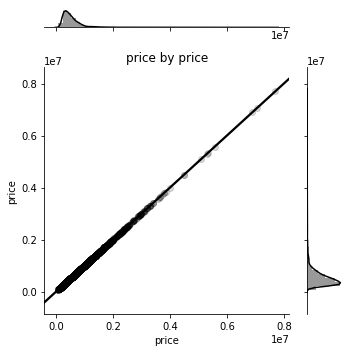

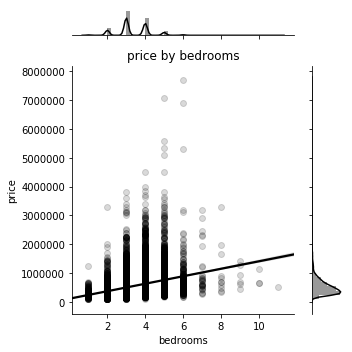

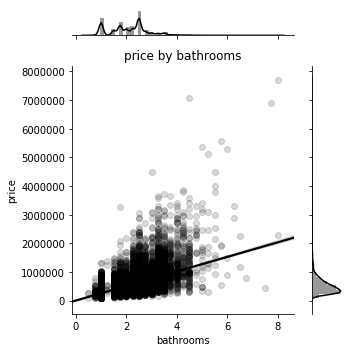

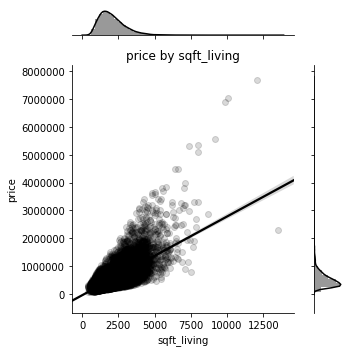

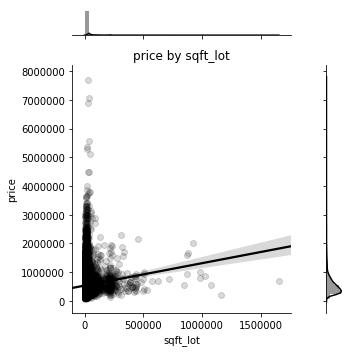

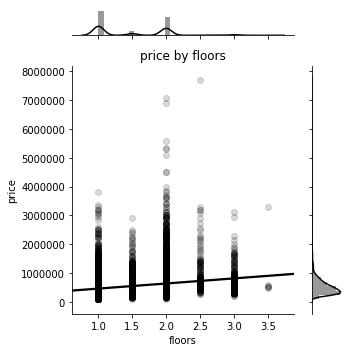

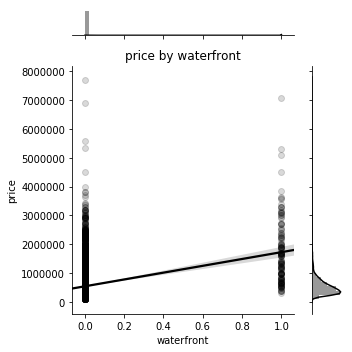

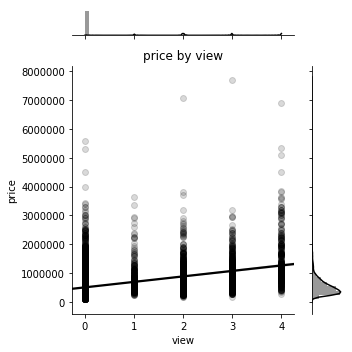

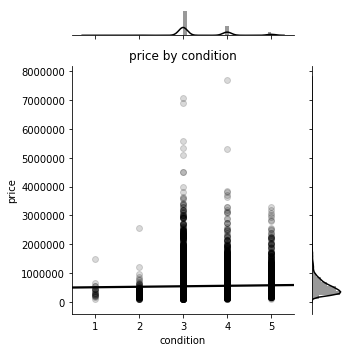

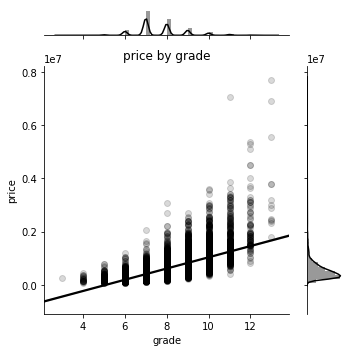

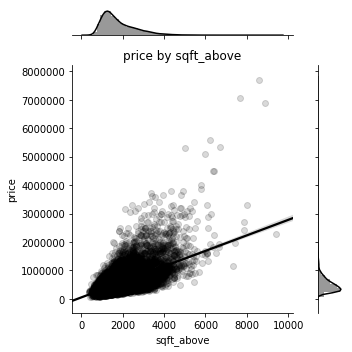

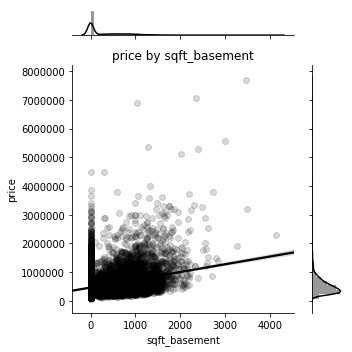

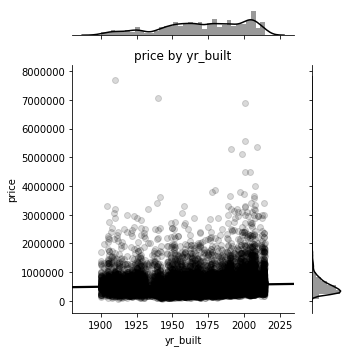

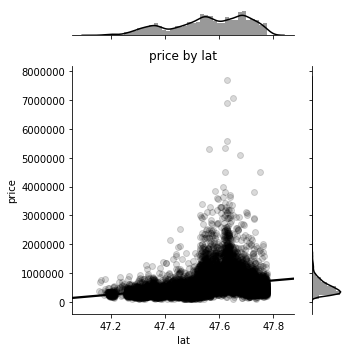

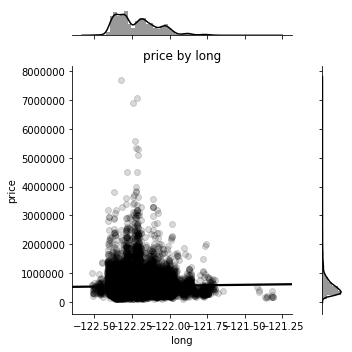

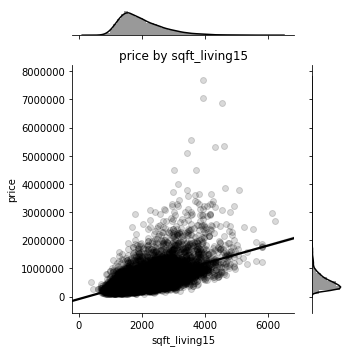

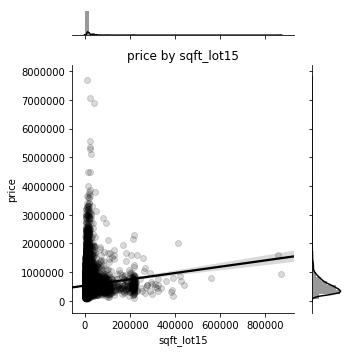

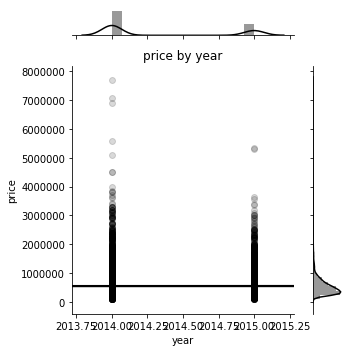

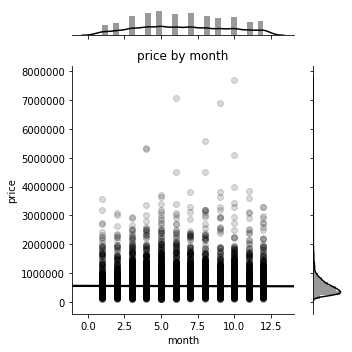

In [26]:
make_jp(numeric_variables_df)

For zipcode, which is our categorical data, we build a countplot and a striplot to understand its shape independently and in relation to price. 

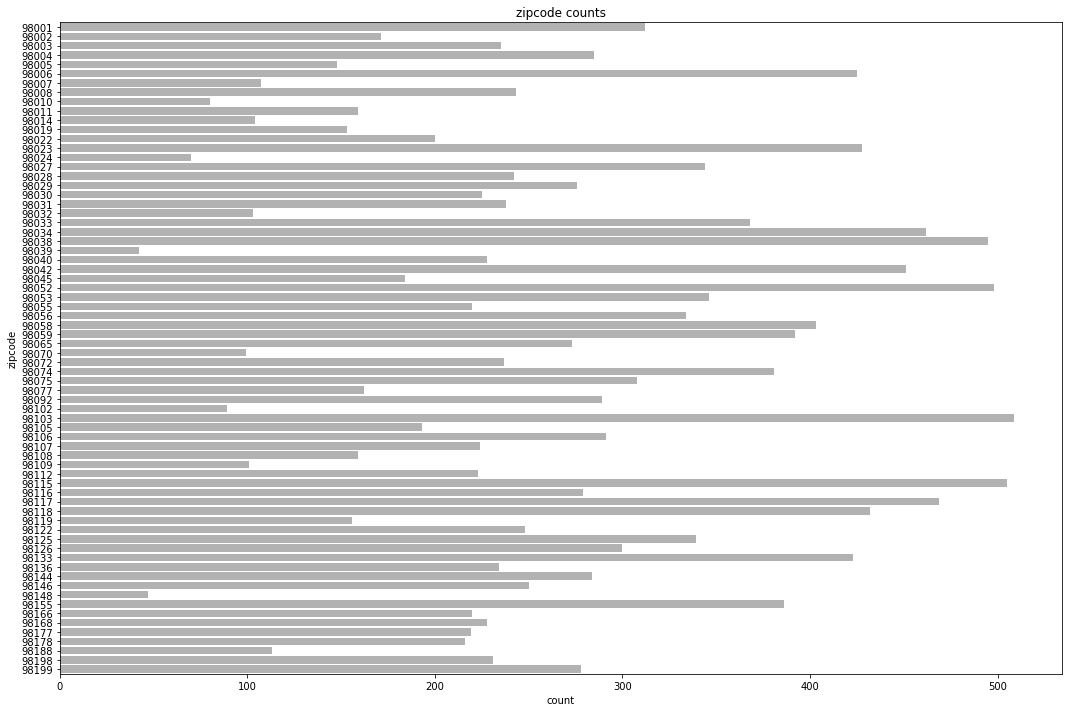

In [27]:
plt.figure(figsize=(15, 10))
zcount = sns.countplot(y='zipcode', color='k', data=df, alpha=0.3)
plt.title('zipcode counts')
plt.tight_layout()

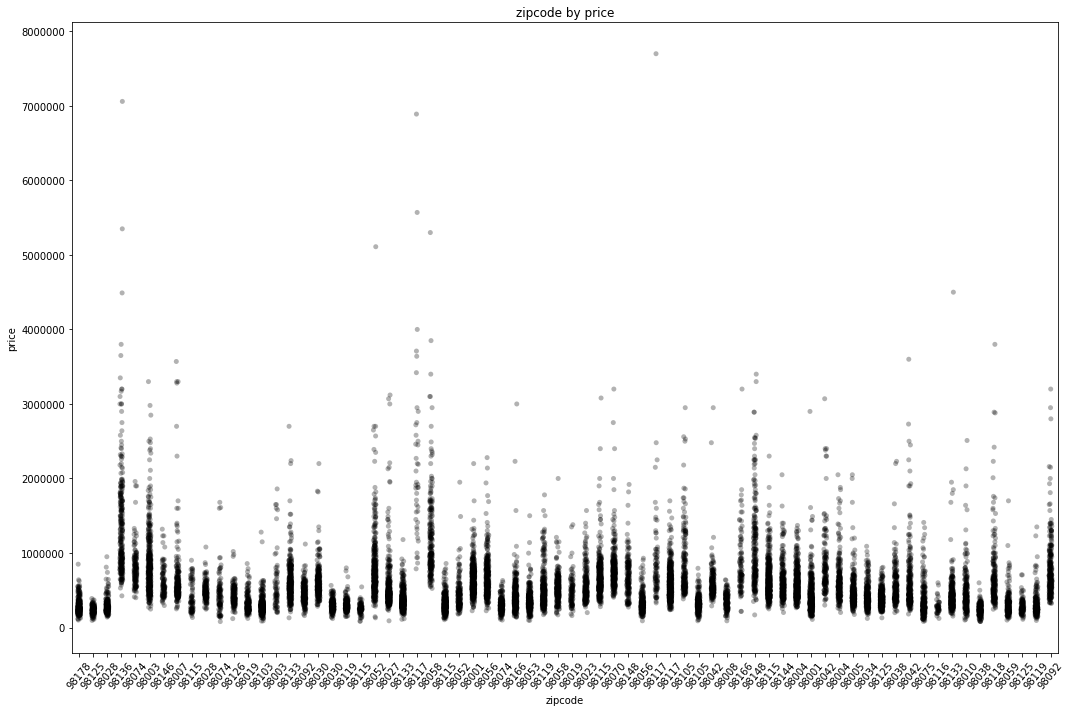

In [28]:
plt.figure(figsize=(15, 10))
zscatter = sns.stripplot(x='zipcode', y='price', color='k', data=df, alpha=0.3)
zscatter.set_xticklabels(df['zipcode'], rotation=50)
plt.title('zipcode by price')
plt.tight_layout()

### Feature Scaling

We think distance to employment center will be an important predictor variable and use latitude and longitude to calculate distance from Seattle with the Pike Pine Retail Core as the epicenter.

In [29]:
long_lat = df[['long', 'lat']] # take dataframe subset of longitude and latitude

In [30]:
# adapted from:  https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points/4913653

from math import radians, cos, sin, asin, sqrt

def haversine(df_lon_lat, lon2=-122.336283, lat2=47.609395):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees), in this case the 2nd point is in the Pike Pine Retail Core
    """
    lon1, lat1 = df_lon_lat[0], df_lon_lat[1]
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371 * c
    return km

df['dist_to_seattle'] = long_lat.apply(haversine, axis=1)

And we use a joint plot to look at the relationship between distance to Seattle and price.

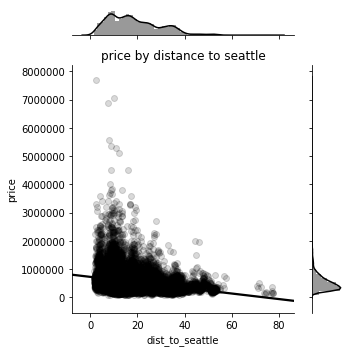

In [31]:
sns.jointplot(df['dist_to_seattle'], df['price'], kind='reg', color='k', scatter_kws={'alpha':0.15}, height=5)
plt.title('price by distance to seattle')
plt.tight_layout()

From our domain knowledge of real estate, we know that house prices are often set by the prices of surrounding houses. We explore using latitude and longitude to determine average housing price of the 15 nearest neighbors and estimate that it would add ~200 million columns and be too computationally expensive. We explore using other libraries like GeoPandas and SciPy to make it less computationally expensive. We believe that using the scipy.spatial.cKDTree class (https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.cKDTree.html) is a viable way to do it but due to time constraints decide to move on. Instead we take the average zipcode price as an additional predictor variable.

In [32]:
df['z_price'] = df['zipcode'].map(df.groupby('zipcode')['price'].mean())

And use another jointplot to look at the relationship between average zipcode price and price.

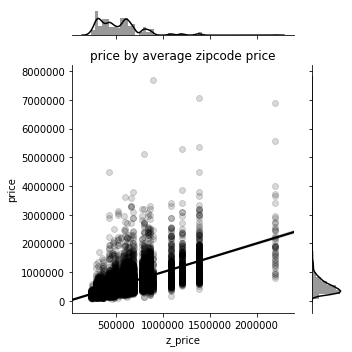

In [33]:
sns.jointplot(df['z_price'], df['price'], kind='reg', color='k', scatter_kws={'alpha':0.15}, height=5)
plt.title('price by average zipcode price')
plt.tight_layout()

### Check for Multicollinearity

To look for multicollinearity we make a heatmap to get a visual of the correlation matrix for our data.

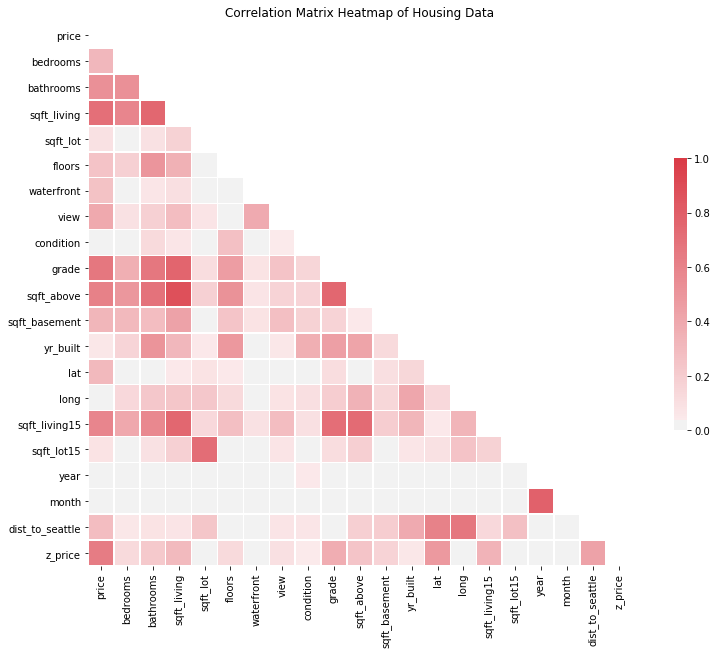

In [34]:
def corr_matrix(df):
    """Make a correlation matrix to check data for collinearity."""
    # Compute the correlation matrix
    corr = np.abs(df.corr())

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 10))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    plt.title('Correlation Matrix Heatmap of Housing Data')
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5});
    
corr_matrix(df)

We decided to use the absolute value of 0.7 as a cut-off for high correlation.

In [35]:
df_corr = abs(df.corr()) > 0.70
df_corr.sum()

price              2
bedrooms           1
bathrooms          2
sqft_living        6
sqft_lot           2
floors             1
waterfront         1
view               1
condition          1
grade              4
sqft_above         4
sqft_basement      1
yr_built           1
lat                1
long               1
sqft_living15      4
sqft_lot15         2
year               2
month              2
dist_to_seattle    1
z_price            1
dtype: int64

Square Foot Living is the variable with the greatest collinearity, which is important for determining which variable has the greatest impact on predicting housing price. We leave in all the variables for now because our task is to build a good model, not determine the variable with the greatest impact. 

### Data Transformation

From our initial visualizations and model tests, we decide to log transform some of the data to improve our model. First, we eliminate columns from our numerical variables dataframe if they contain values equal to 0 or negative numbers, and then write a function to help us visually determine whether or not to log any of the other data columns. 

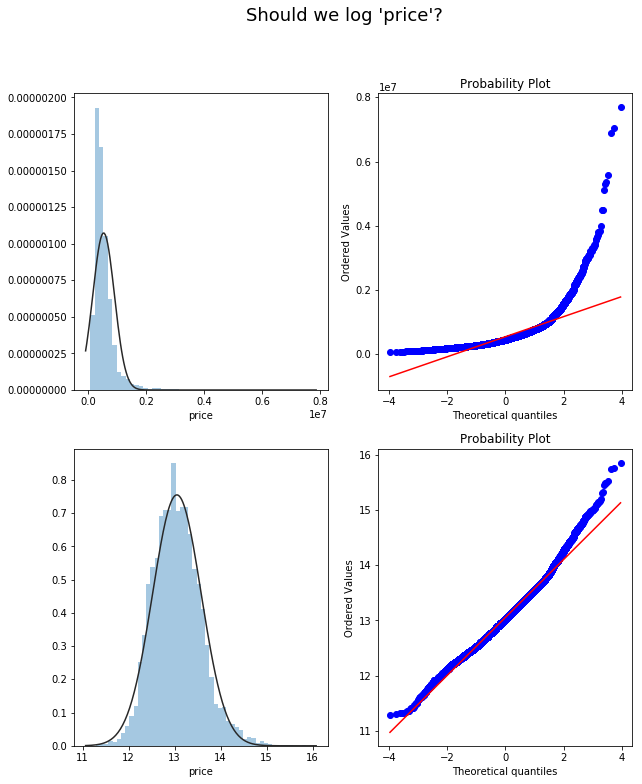

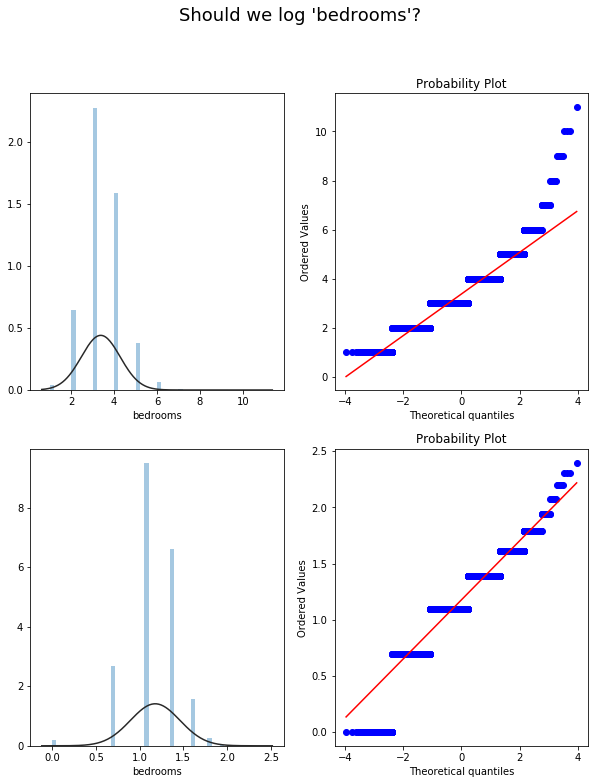

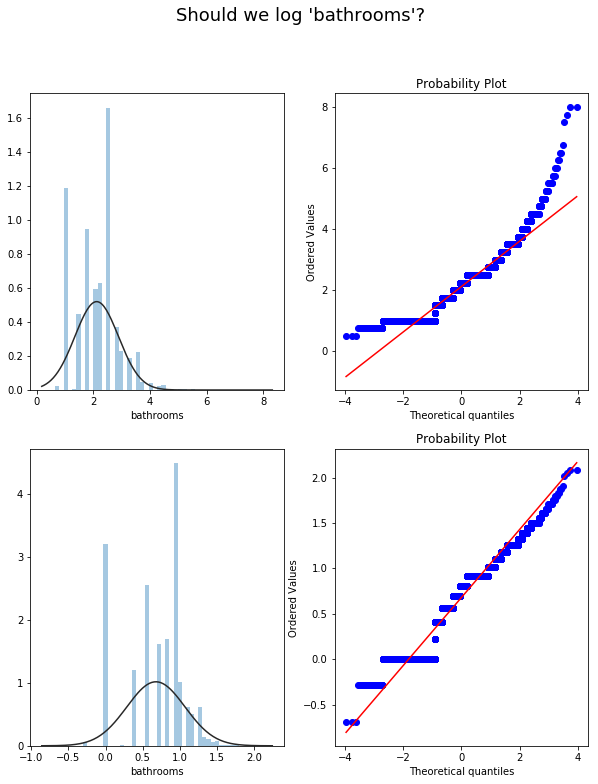

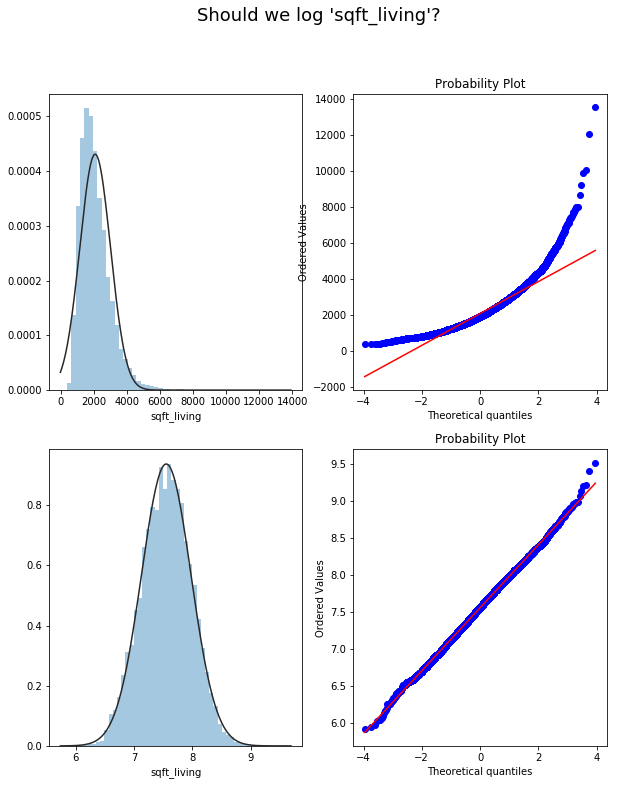

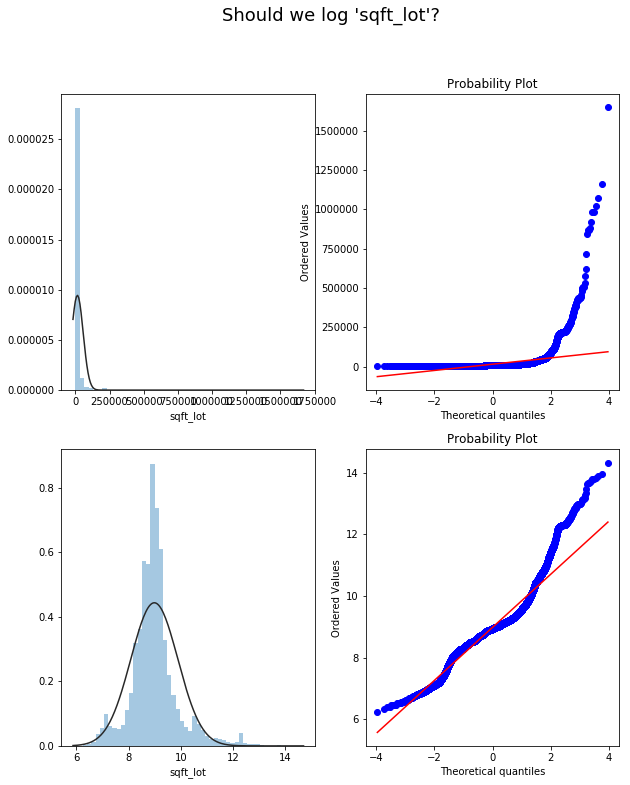

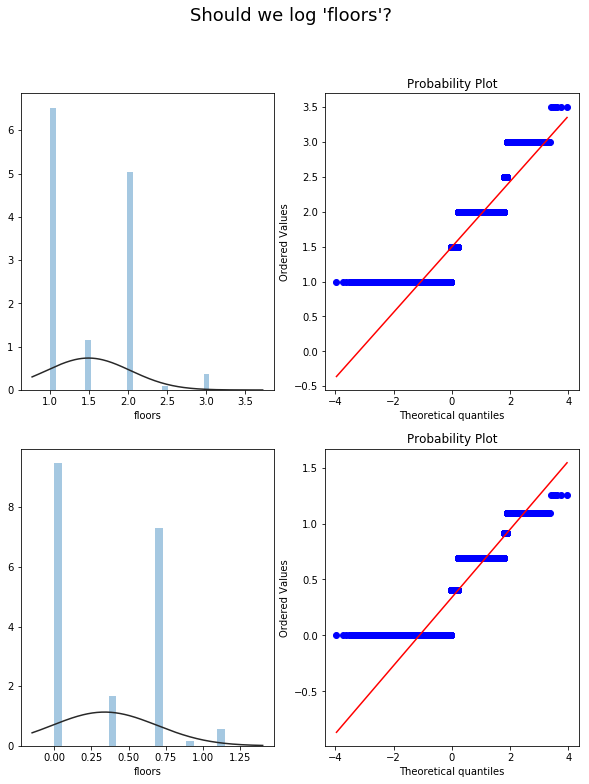

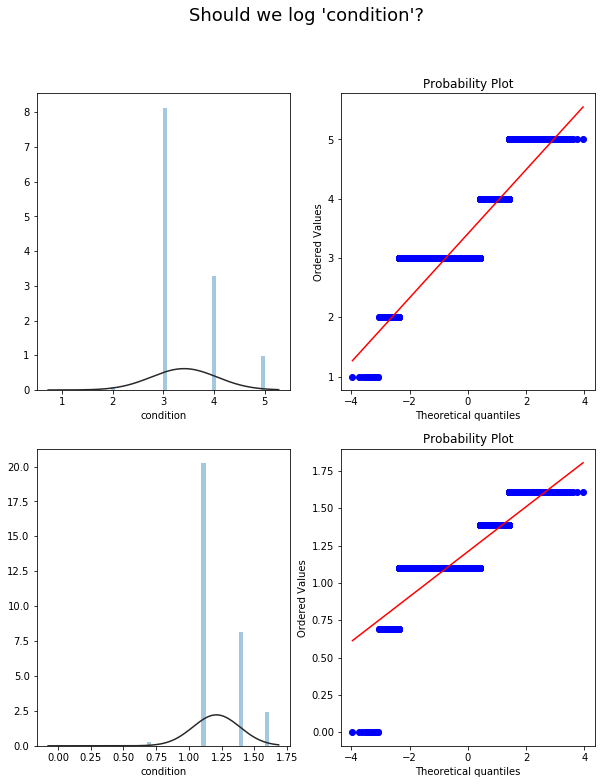

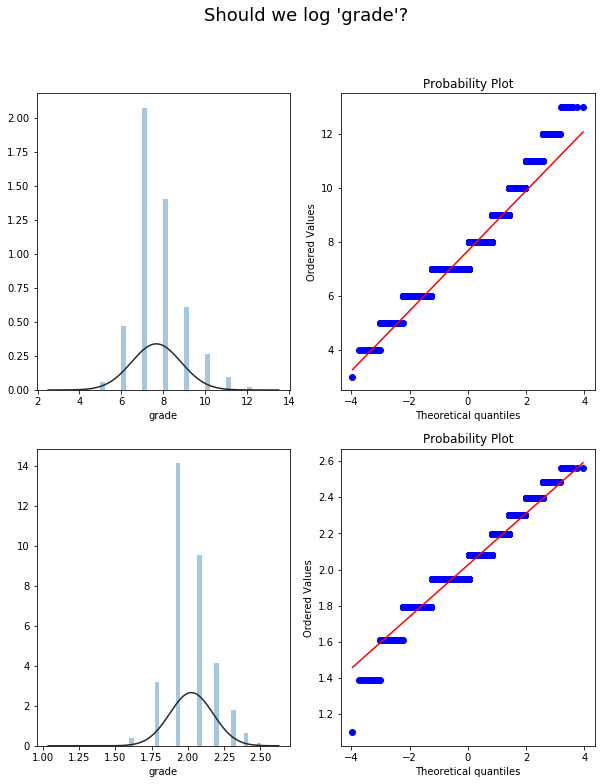

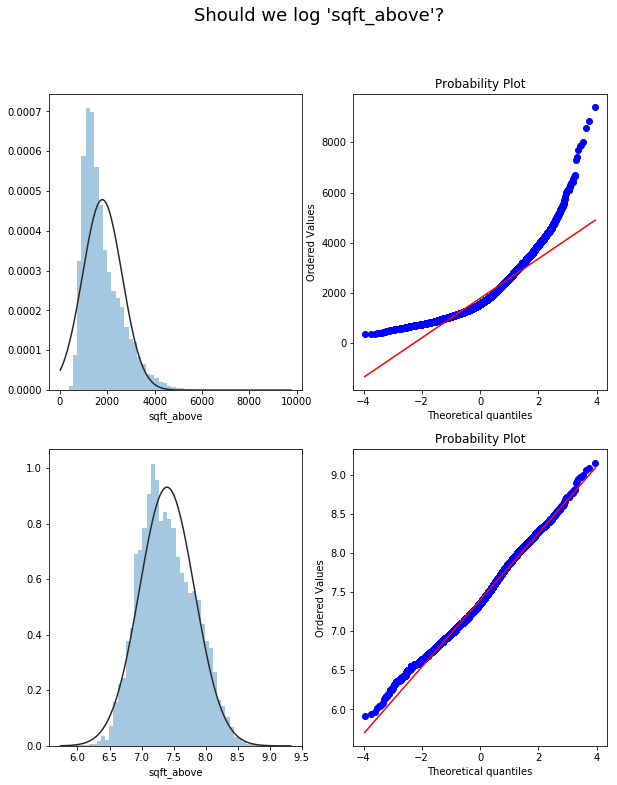

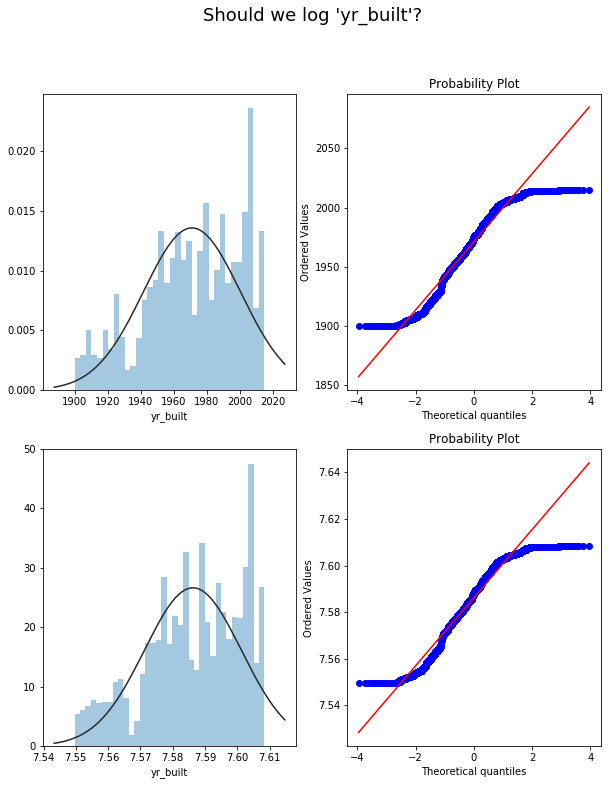

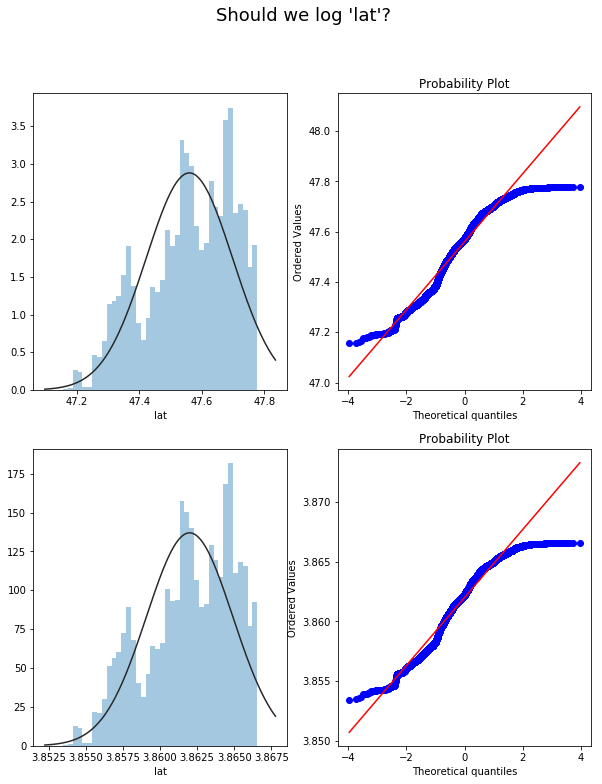

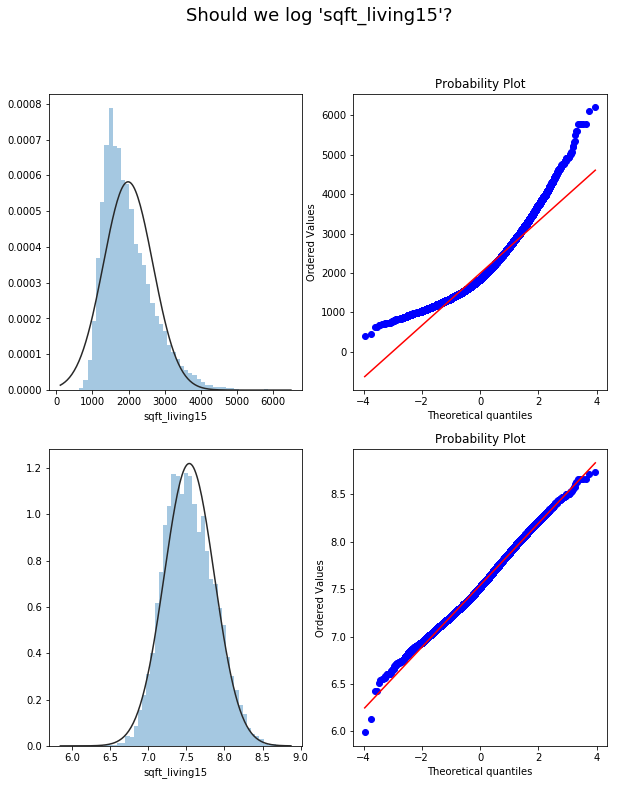

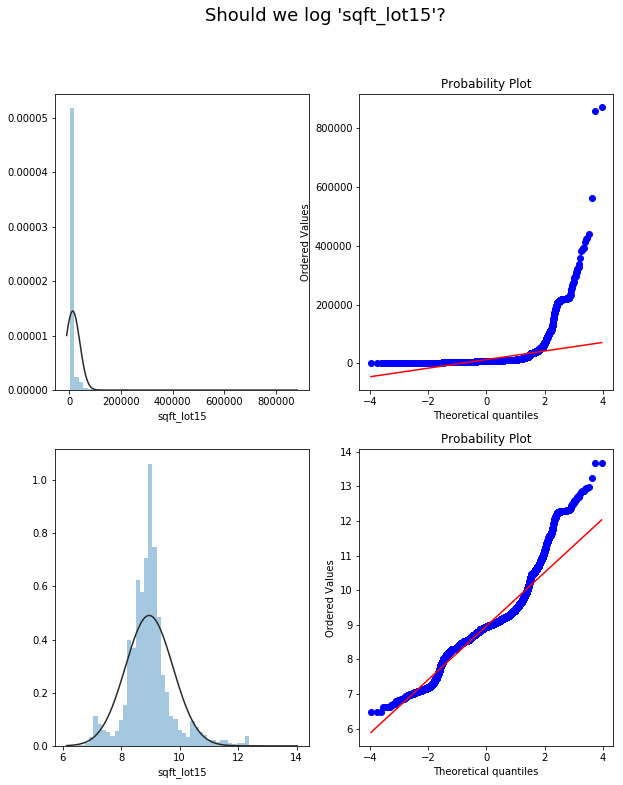

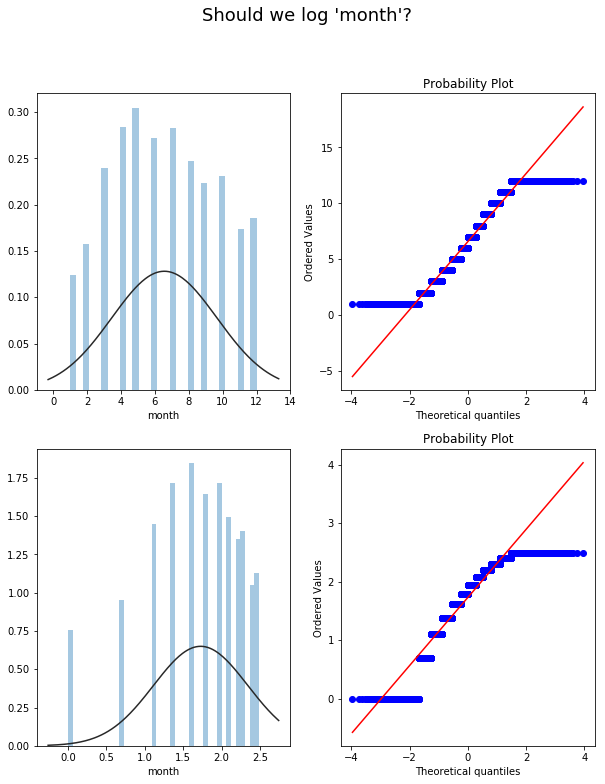

In [36]:
log_test_df = numeric_variables_df.drop(['year', 'view', 'waterfront', 'sqft_basement', 'long'], axis=1).copy()

def log_test(df):
    """Creates a histogram and probability plot of each column before and after logging."""
    for col in df.columns:
        plt.figure(figsize=(10,12))
        plt.subplot(2,2,1)
        sns.distplot(df[col], fit=norm, kde=False)
        plt.subplot(2,2,2)
        stats.probplot(df[col], plot=plt)
        try:
            plt.subplot(2,2,3)
            sns.distplot(np.log(df[col]), fit=norm, kde=False)
            plt.subplot(2,2,4)
            stats.probplot(np.log(df[col]), plot=plt)
        except:
            pass
        plt.suptitle(f"Should we log '{col}'?", fontsize=18)
        plt.show()
        
log_test(log_test_df)

For the log test visualizations, we look for whether the probabilty plot aligns and if the histogram becomes more normally distributed after logging. Based on the visualizations we decide to log price, bedrooms, bathrooms, square foot living, square foot lot, square foot above, square foot living and lot of nearest 15 neighbors, distance to Seattle, and average zipcode price. Below is out function to convert the data we want logged. Because we want to test our model with logged and unlogged data, we wait to run it in the modeling section.

In [37]:
to_log = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'dist_to_seattle', 'z_price']

def log_data(data=df, to_log=to_log):
    """Creates dataframe with logged data in columns defined by to_log."""
    logged_data = data.copy()
    
    for col in to_log:
        header = "log_of_"+col
        logged_data[header] = np.log(logged_data[col])
        logged_data = logged_data.drop(col, axis=1)
    return logged_data

### One-Hot-Encoding

Before modeling we one-hot-encoded zipcode and month so that its numeric nature would not artificially bias the model coefficient. Zipcode is already a string, we convert month to a string type.

In [38]:
df['month'] = df['month'].astype(str)
df['month'].dtype

dtype('O')

One-hot encode, or create dummy variables for zipcode and month. Drop zipcode and month columns from dataframe and add one-hot encoded variables. 

In [39]:
z_dummies = pd.get_dummies(df['zipcode'], prefix='z')
m_dummies = pd.get_dummies(df['month'], prefix='m')

In [40]:
df = df.drop(['zipcode', 'month'], axis=1)

In [41]:
df = pd.concat([df, z_dummies, m_dummies], axis=1)

Our data is ready for modeling. We have a dataframe with all predictor variables and the target variable of price. We also build a dataframe of only predictor variables.

In [42]:
variable_df = df.drop('price', axis=1)

## Step 3: Modeling of King County Housing Data with Multivariate Linear Regression

### Linear Regression Models

We use the mean absolute error (MAE) as the metric to determine how well our model predicts housing price. We create a dictionary to keep track of our models, using the key as a tuple of the standard deviation and MAE, while the values are the variables used in the model. We write a function to perform a k-folds train test split linear regression on our data to build a model. The function returns the model and saves its results in our model tracking dictionary.

In [47]:
all_model_mae = {}

def linreg_tts(data, response, k=5):
    """Performs k-folds train test split linear regression on data that saves results in dictionary and returns model."""
    y = response
    X = data
    X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2)
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    predictions = linreg.predict(X_test)

    plt.scatter(y_test, predictions)
    plt.xlabel(f"True Values")
    plt.ylabel(f"Multi Variable Linear Predictions")
    plt.title("Linear Regression Model")
    print("Single LinReg Score:", model.score(X_test, y_test))  
    
    cross_val_array = cross_val_score(linreg, X, y, cv=k, scoring="neg_mean_absolute_error")
    avg_cross_val = np.mean(cross_val_array)
    mae = -avg_cross_val
    all_model_mae[(mae, cross_val_array.std())] = list(data.columns)
    print(f"MAE with {k} folds:{mae}")
    return model


First we make a single linear regression model of unlogged data between square foot living (the predictor variable with the greatest collinearity) and price.

Single LinReg Score: 0.48049933133674105
MAE with 5 folds:174823.32949113566


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

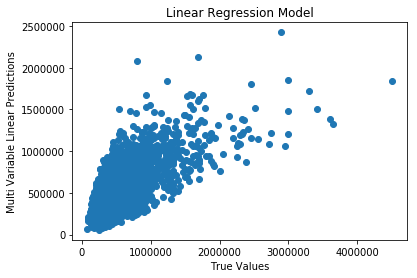

In [48]:
linreg_tts(df[['sqft_living']], df[['price']])

For a single variable the model is okay. The MAE is high at $174,823. <br> <br> Next, we run a multivariate regression model of all the unlogged variables and price.

Single LinReg Score: 0.8198262364184614
MAE with 5 folds:96525.621774148


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

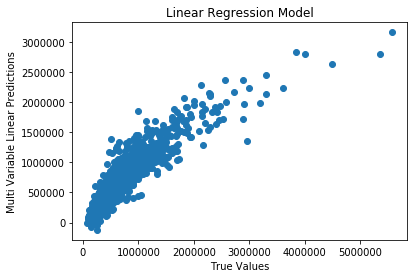

In [49]:
linreg_tts(variable_df, df[['price']])

Here we see that more variables helps our model immensely. The MAE is down to $96,526. <br>

Then, we incorporate our logged data, using our log_data function. 

Single LinReg Score: 0.8844739014917735
MAE with 5 folds:0.12990642831401136


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

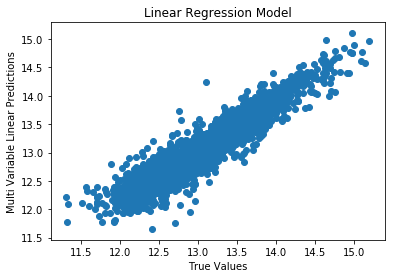

In [51]:
logged_data = log_data(df)
linreg_tts(logged_data.drop(['log_of_price'], axis=1), logged_data[['log_of_price']])

Notice the MAE is now a percentage because we have logged data. This is roughly equivalent to an absolute error percentage of 13%, and comparing the r-squared values of between our logged and non-logged models, we believe 13% MAE is an improvement. <br>

We try removing outliers next with unlogged data.

Single LinReg Score: 0.8309485738098653
MAE with 5 folds:67423.97469774816


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

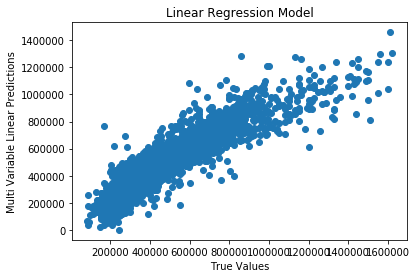

In [54]:
no_outliers = df[(np.abs(zscore(numeric_variables_df.loc[:, numeric_variables_df.columns])) < 3).all(axis=1)]   
linreg_tts(no_outliers.drop(['price'], axis=1), no_outliers['price'])

With an MAE of $67,423, removing unlogged data without outliers is an improvement to unlogged data. Based on the r-squared values, this improvement is not as good as logging the data. <br> <br> The last model we build logs the data with outliers removed by calling the log_data function on our no outliers dataframe.

Single LinReg Score: 0.87037285148925
MAE with 5 folds:0.1236259625643877


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

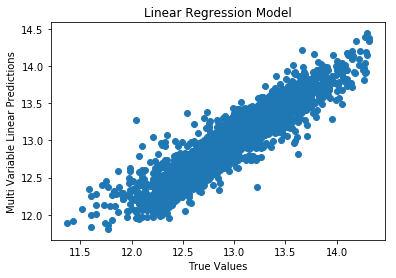

In [55]:
logged_data_no_outliers = log_data(no_outliers)
linreg_tts(logged_data_no_outliers.drop(['log_of_price'], axis=1), logged_data_no_outliers[['log_of_price']])

Our final model has an MAE of 12%, which is our best model to predict housing price. We have a dictionary of all the results from our models for reference accessible by calling all_model_mae. <br> <br> The last step is to validate our model with the 15% of data we set aside at the beginning. We run that below using a summary function of all our data manipulations. 